# Project Description

<div class="alert alert-block alert-info">

<b> This is a study for the benefit of the gym "Model Fitness" to tackle one of the most common problems a gym faces : custommer churn.<br/>

In order to fight churn, Model Fitness has digitized a number of its customer profiles. And in this study, our mission is to analyze them and come up with a customer retention strategy.<br/>
    
To do so, we will predict the probability of churn (for the upcoming month) for each customer, sort the users into typical user portraits and describe their main features, analyze the factors that impact churn most. We will also draw basic conclusions and develop recommendations on how to improve customer service by dentifying target groups and suggesting measures to cut churn.<br/>
</b> </div>

# Table of contents  

1. [Data Preprocessing and Exploratory Analysis](#1)   
    1.1. [Importing and Examining Data](#11)    
    1.2. [Outliers and Correlation](#12)   
    1.3. [Client Study](#13) 
2. [Machine Learning and Predictions](#2)    
3. [User Categorization](#3)     
    3.1. [Hierarchical Clustering](#31)    
    3.2. [K-Means Clustering](#32)   
    3.3. [Cluster Visualization](#33)     
4. [Conclusion](#4) 
   

## 1. Data Preprocessing and Exploratory Analysis <a name="1"></a>

###  Importing and Examining Data: <a name="11"></a>

In [1]:
import requests
import sys
import warnings
import time

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import math as mth


from scipy import stats as st
from io import BytesIO
from scipy.stats import ttest_ind
from IPython.display import display_html 
from pandas.plotting import register_matplotlib_converters
from plotly import graph_objects as go 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster import hierarchy


if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
!pip install seaborn --upgrade
!pip install plotly --upgrade

In [4]:
# Opening the data files, taking into consideration the separator
data_url = 'https://drive.google.com/file/d/1z_GPIB3vm9gxLAzoo66v1_wXv9GAzU_G/view?usp=sharing'
data_url = 'https://drive.google.com/uc?id=' + data_url.split('/')[-2]
data = pd.read_csv(data_url)


# We print informations about the dataset to examine
print(' ')
print('---------------------------------- Informations About the Experiment Logs Dataset ----------------------------------')
print(' ')
display (data.info())
print(' ')

# Print a few lines of the datasets to examine data
print('----------------------------------------------- Sample of the dataset ----------------------------------------------')
display(data.head(10))

 
---------------------------------- Informations About the Experiment Logs Dataset ----------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10 

None

 
----------------------------------------------- Sample of the dataset ----------------------------------------------


gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   
5       1              1        0              0      1                1   
6       1              1        1              1      0                6   
7       0              1        0              0      1                1   
8       1              1        1              1      1                1   
9       0              1        0              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   
5             1   34                    450.743960                    1.0   
6             1   32                     94.266389                    6.0   
7             0   30                    217.786641                    1.0   
8             1   23                     45.409909                    1.0   
9             0   31                     65.310836                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   
5         3                   2.623477                           2.637007   
6         2                   1.138941                           1.277242   
7         0                   1.213502                           1.049387   
8         1                   1.106239                           1.059333   
9        11                   1.810852                           1.951368   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      1  
8      0  
9      0

<div class="alert alert-block alert-info">
<b>Observations :</b>  

From the first observation of the data informations, and the first lines of the data, we can state the following :  <br/>

- The dataset, which we named **'data'**, contains **4000** rows of data with information on the gym's clients. The data is separated into the following 14 columns :  <br/>
    User related data :<br/>
    - **gender** : a binary column indicating the client's gender;<br/>
    - **Near_Location** : a binary column indicating whether the client lives or works near the gym ;<br/>
    - **Partner** : a binary column indicating if the client is from a partner company (which makes them elligible for discounts) ;<br/>
    - **Promo_friends** : a binary column indicating if the user originally signed up through a "bring a friend" offer ;<br/>
    - **Phone** : a binary column precising if the client has provided a phone number ;<br/>
    - **Age** : the client's age ;<br/>
    - **Lifetime** : time period since the client's first visit to the gym ;<br/>
    
    User's activity related data :<br/>
    - **Contract_period** : the duration of the client's contract in months (1, 3, 6 or 12)<br/>
    - **Group_visits** : a binary column defining if the client takes part in group sessions ;<br/>
    - **Avg_additional_charges_total** : the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc ;<br/> 
    - **Month_to_end_contract** : the number of months remaining until the client's current contract expires ;<br/>
    - **Avg_class_frequency_total** : average frequency of visits per week during the client's lifetime ;<br/>
    - **Avg_class_frequency_current_month** : average frequency of visits per week over the preceding month ;<br/>  
    
    The target variable :<br/>
    - **Churn** : a binary column defining if the client has churned in the current month.<br/>
    
- We notice that the data has no missing values.<br/>
- From this point onwards, we will refer to the churn column as the **'target'** and the remaining columns as the **'features'**.<br/>
    
</div>

In [5]:
# Changing data types for boolean columns
boolean_columns = ['gender' , 'Near_Location' , 'Partner' , 'Promo_friends' , 'Phone' , 'Group_visits', 'Churn']

for column in boolean_columns :
    data[column] = data[column].astype('bool')

# Checking for duplicates
print('----------------------------------------------------------------------------------')
print('')
print('number of duplicated rows in "data" :', data.duplicated().sum())
print('')
print('----------------------------------------------------------------------------------')

# Info
data.info()

----------------------------------------------------------------------------------

number of duplicated rows in "data" : 0

----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   bool   
 1   Near_Location                      4000 non-null   bool   
 2   Partner                            4000 non-null   bool   
 3   Promo_friends                      4000 non-null   bool   
 4   Phone                              4000 non-null   bool   
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   bool   
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 

**The data set has no missing values and no duplicates. <font color='blue'>We have also transformed the data type for boolean columns to the correct type,</font> which makes the data ready for analyzing.**


###  Outliers and Correlation : <a name="12"></a>

In this phase, we will examine the numerical columns for outliers.

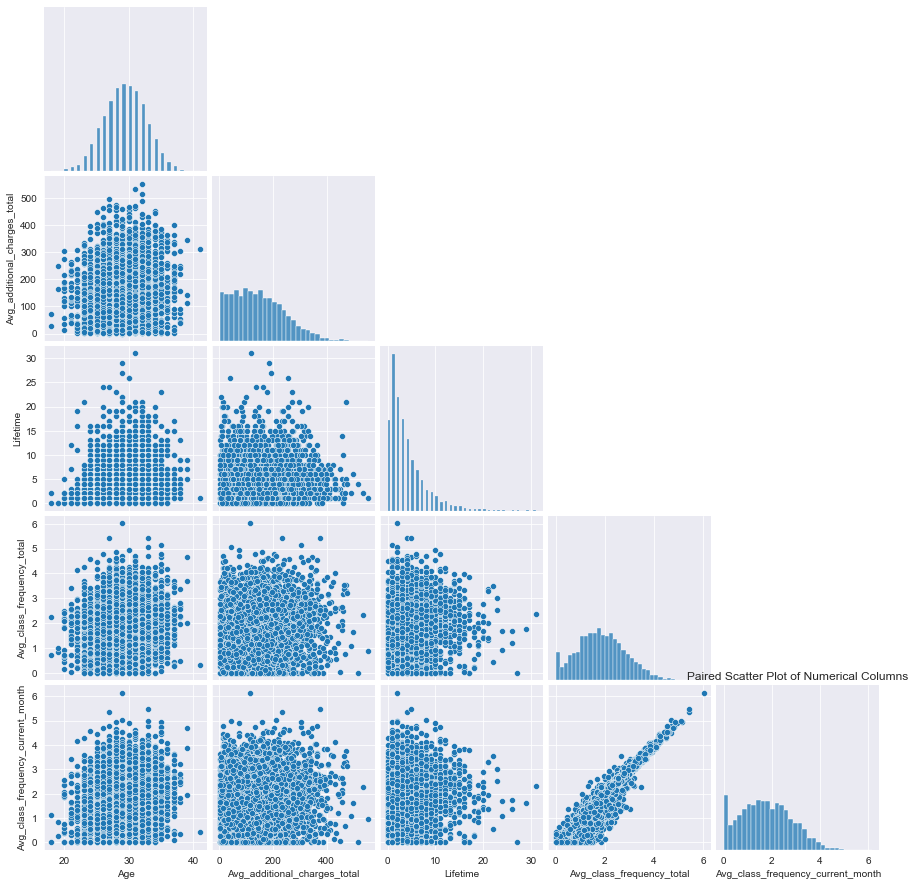

In [6]:
# Plotting paired distribution feature-traget variable diagrams for each feature
sns.set_style("darkgrid")
sns.pairplot(data[['Age', 'Avg_additional_charges_total' , 'Lifetime', 'Avg_class_frequency_total',
           'Avg_class_frequency_current_month']], corner = True) 
plt.title('Paired Scatter Plot of Numerical Columns')
plt.show()

<div class="alert alert-block alert-info">

<font color='blue'><b> Observations :</b>  

From the graphs above, we observe the following :  
- the age graph is a normal distribution. For the gae paired graphs, we notice that most the clients are concentrated around the age 30 and that charges, lifetime and average class frequency represent no outliers,
- The average additional charges graph is a non-normal distribution, with most clients spending little to no additional money on extra services. The paired graphs show no particular dependence or outliers,
- The Lifetime graph is an exponential distribution with the majority of clients being new ones, and a few clients surpassing the 2 years line. We notice through the paired graphs with class frequency that the clients' habit differs, but there is a concentration on the left bottom corner of the graphs and older clients tend to have less classes per week,
- Both average class frequency distributions are non-normal distributions, where some of clients have a very small class average (<1) and a very small minority with more than 4 sessions per week. We also notice a concentration around the x=y line, this insinuates an almost linear relation between the monthly and total average class frequency.
    </font>
</div>

In [7]:
# Examining the data distribution
data.describe()

Contract_period          Age  Avg_additional_charges_total  \
count      4000.000000  4000.000000                   4000.000000   
mean          4.681250    29.184250                    146.943728   
std           4.549706     3.258367                     96.355602   
min           1.000000    18.000000                      0.148205   
25%           1.000000    27.000000                     68.868830   
50%           1.000000    29.000000                    136.220159   
75%           6.000000    31.000000                    210.949625   
max          12.000000    41.000000                    552.590740   

       Month_to_end_contract     Lifetime  Avg_class_frequency_total  \
count            4000.000000  4000.000000                4000.000000   
mean                4.322750     3.724750                   1.879020   
std                 4.191297     3.749267                   0.972245   
min                 1.000000     0.000000                   0.000000   
25%                 1.000000     1.000000                   1.180875   
50%                 1.000000     3.000000                   1.832768   
75%                 6.000000     5.000000                   2.536078   
max                12.000000    31.000000                   6.023668   

       Avg_class_frequency_current_month  
count                        4000.000000  
mean                            1.767052  
std                             1.052906  
min                             0.000000  
25%                             0.963003  
50%                             1.719574  
75%                             2.510336  
max                             6.146783

In [8]:
# Age count 
percentages = data['Age'].value_counts().reset_index()
percentages.columns = ['Age' , 'count']
percentages['%'] = percentages['count'] / 4000 * 100
percentages = percentages.sort_values(by = 'Age' , ascending = True)
percentages['sum']=percentages['%'].cumsum()
percentages

Age  count       %      sum
20   18      2   0.050    0.050
21   19      2   0.050    0.100
17   20     14   0.350    0.450
16   21     24   0.600    1.050
14   22     33   0.825    1.875
12   23     82   2.050    3.925
10   24    148   3.700    7.625
8    25    231   5.775   13.400
6    26    300   7.500   20.900
4    27    378   9.450   30.350
2    28    447  11.175   41.525
0    29    468  11.700   53.225
1    30    457  11.425   64.650
3    31    434  10.850   75.500
5    32    364   9.100   84.600
7    33    253   6.325   90.925
9    34    174   4.350   95.275
11   35     98   2.450   97.725
13   36     48   1.200   98.925
15   37     29   0.725   99.650
18   38     10   0.250   99.900
19   39      3   0.075   99.975
22   41      1   0.025  100.000

<div class="alert alert-block alert-info">
<b>Observations :</b>     
    
The data description and the scatterplots allow us to see that there are for example a few clients that like to splurge on the extras (more than 552$ spent), and that there are clients that have been enjoying this gym for more than 2.5 years. It also shows the following important characteristics :
- Most clients work or live near a location (84%),
- Clients ages range between 18 and 41 but 30% of clients are younger than 27, and 60% of clients are between 28 and 33 years old,
- 90% of clients have provided a phone number,
- More than half the clients are on a 1 month long contract (55%), and the same percentage corresponds to the clients who have 1 month left in their contract (trivial),

We can also state that there are no irregularities in the other columns such as the average session frequency (which doesn't exceed 6 sessions per week). This allows us to conclude that **there are no strong skews or outliers in the data**, which makes it perfect to build a model on.


</div>

###  Client Study : <a name="13"></a>

We will now separate our data into clients who have churned and those who haven't, in order to examine if there is a difference in the averages of numerical features between these clients.

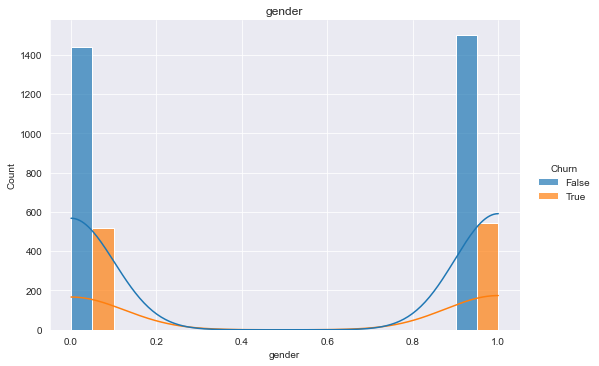

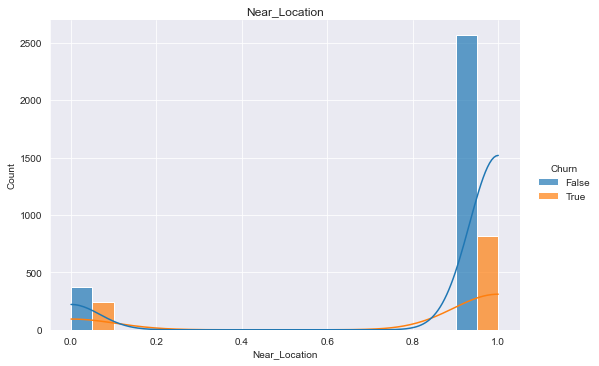

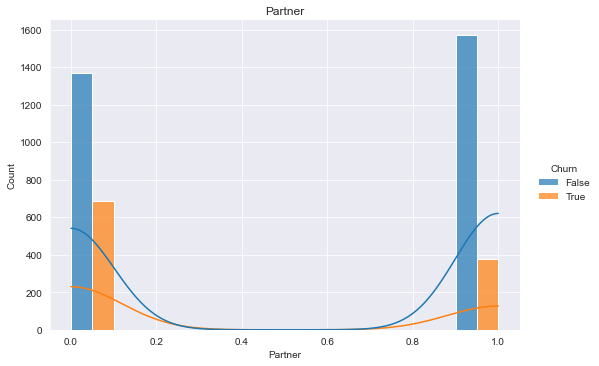

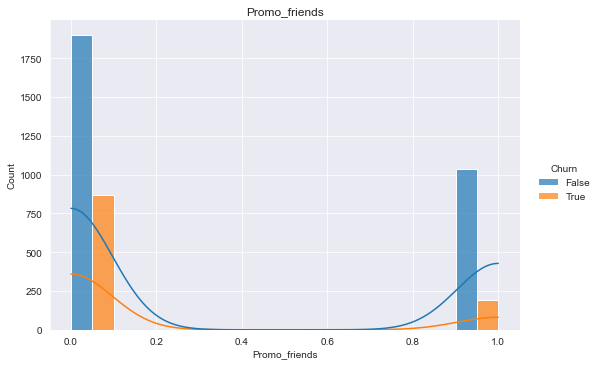

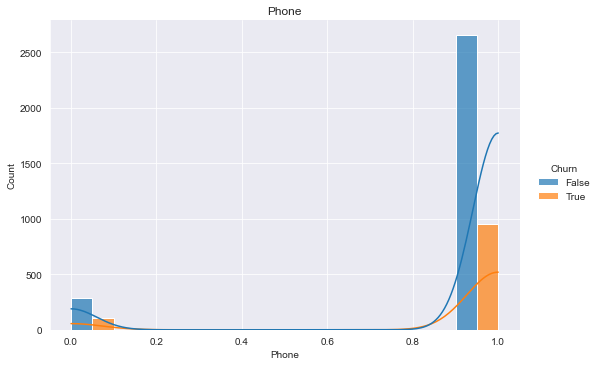

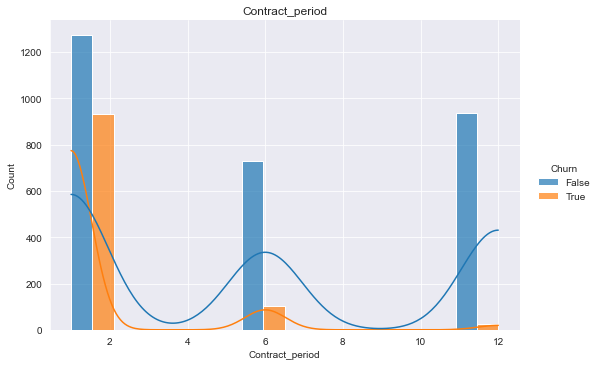

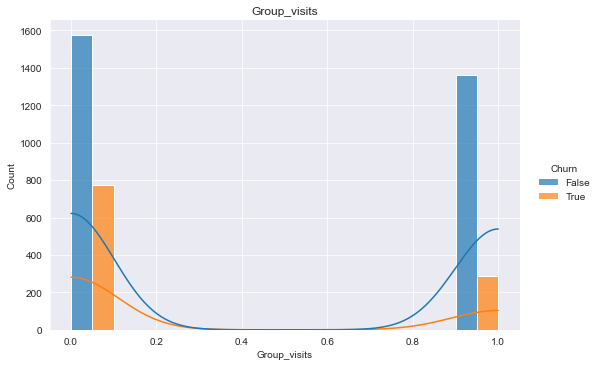

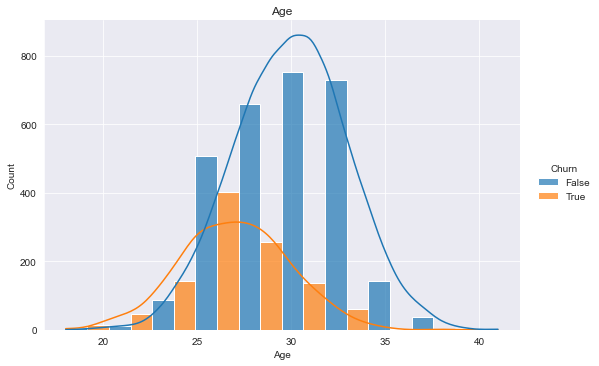

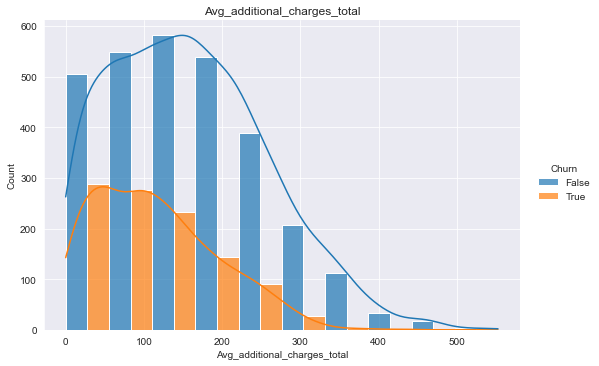

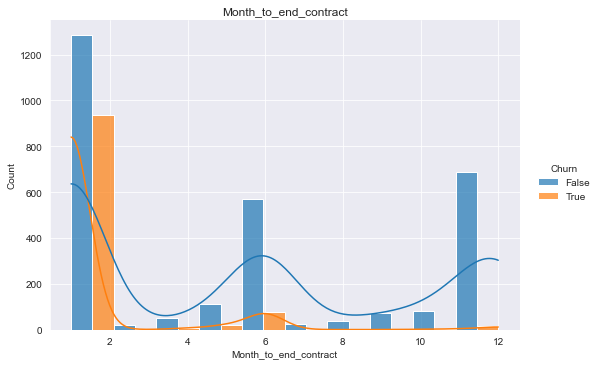

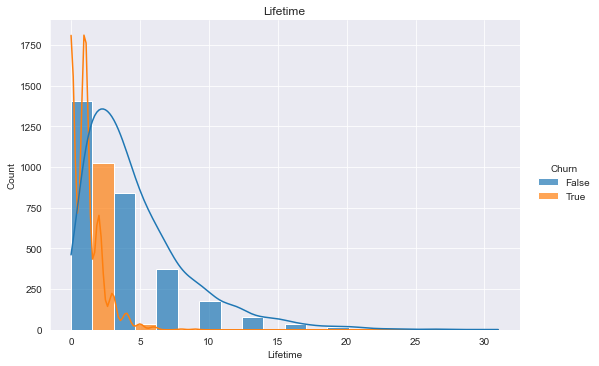

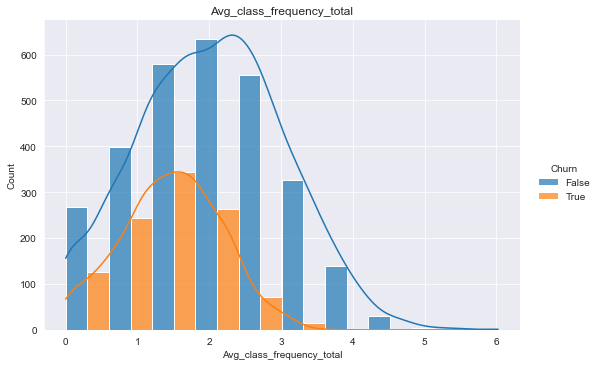

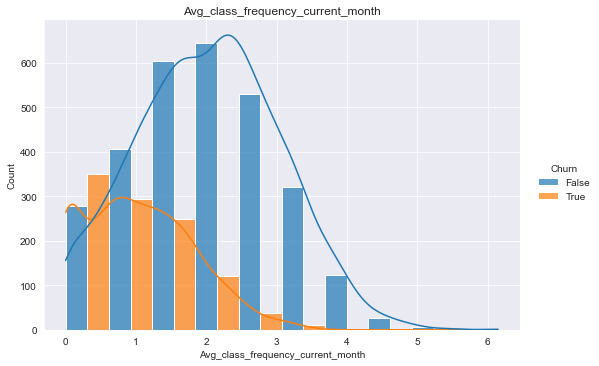

In [9]:
# Plotting paired distribution feature-traget variable diagrams for each feature
for feature in data.drop('Churn', axis = 1).columns:
    sns.set_style("darkgrid")
    sns.displot(data, x = feature,
                hue = 'Churn', 
                kde = True, alpha = .7, 
                multiple = 'dodge', 
                height = 5 , aspect = 1.5, 
                bins = 10)
    plt.title(feature)
    plt.show() 

In [10]:
# Creating dataset of averages for clients who left and those who stayed 
churn_avg = data.groupby('Churn').mean()

# Displaying the dataset
churn_avg

gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
False  0.510037       0.873086  0.534195       0.353522  0.903709   
True   0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
False         5.747193      0.464103  29.976523                    158.445715   
True          1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
False               5.283089  4.711807                   2.024876   
True                1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
False                           2.027882  
True                            1.044546

<div class="alert alert-block alert-info">
<b>Observations :</b>  

From the graphs above and the averages tables, we observe the following :  

- **Gender** : we notice that the behavior of both genders is similar since the proportion of churning clients to the ones that stayed is very similar, this is further proven by the average value for gender for both churn and non churn clients is close to 0.5, this shows that there is no gender bias ;
- **Near_Location** : we can see that the bigger portion of clients is still affiliated with the gym, and that the majority of clients live of work near the location. This applies to both churning and non-churning clients and is proven futher by the averages table ;
- **Partner** : we can tell that most of the clients who have churned their contracts are not affiliated with partners;
- **Promo_friends** : We notice that the majority of the clients who have churned did not come through the friend promotion option ;
- **Phone** : Most clients have provided a phone number, but by looking at the averages we can see a strong skew towards the value 1 for both churning and non-churning clients, with very similar values, this means that **this feature most likely does not affect the churn** ;
- **Contract_period** : Clients who choose the shortest contract period are the most likely to churn ;
- **Group_visits** : Most of the clients who have churned haven't participated in a group session, this is further proven by the average which is skewed towards the 0 value ;
-**Age** : The distribution shows that most loyal clients tend to be older as we see a shift in the average age by 3 years. We can also state that the clients younger than 26 years of age are most likely to churn, as the clients who have churned below this age exceed those who haven't ;
- **Avg_additional_charges_total** : we observe that both distributiona are negatively skewed, but in general, clients who haven't churned tend to spend more than those who have, this is further confirmed by the average spending for churning customers (115 dollars) being smaller than that of loyal customers (158 dollars);
- **Monts_to_end_contract** : we notice that the majority of the churning clients have less than 2 months left in their contract, this is also confirmed by the average number of months remaining for churning clients being 1,66 months and for loyal clients 5.2 months. This leads to the hypothesis that **clients tend to leave when their contracts are almost running out** ;
- **Lifetime** : This is an exponential distribution, whihc shows that older clients (with high values), tend to stay while newer clients have a high churn possibility, and that **starting from 5 months, clients are highly unlikely to churn their contracts** ;
- **Avg_class_frequency_total** : We notice that loyal clients spend more time in the gym (that's only natural), but only slightly, since the average for these ones in 2 weekly sessions and for the churning clients 1.5 sessions;
- **Avg_class_frequency_current_month** : in the current months, the clients who have had 0 sessions and have churned are more than those who stayey, the distribution also shows that the less time a client spends in the gym the more like they are to churn .

</div>

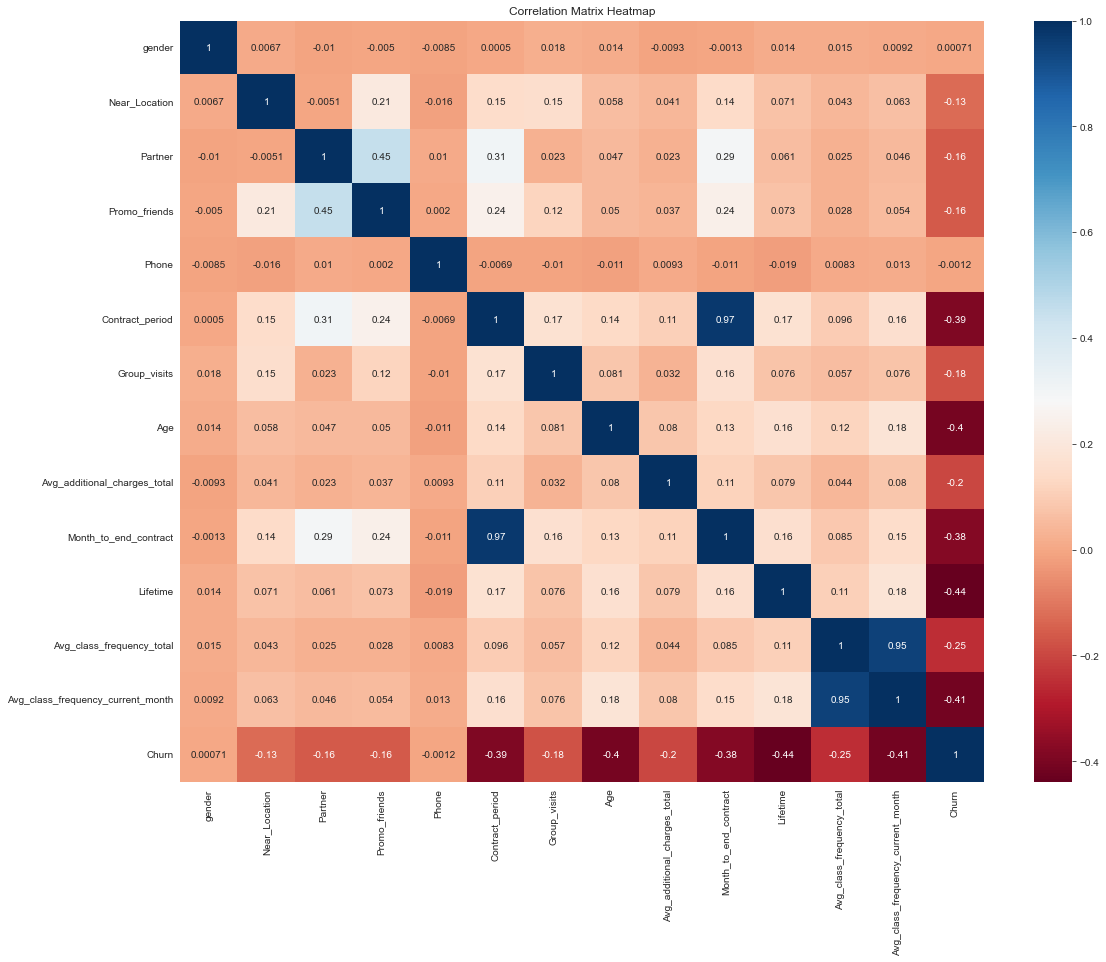

In [11]:
# Building and rendering a correlation matrix
cm = data.corr()

plt.figure(figsize = (18,14))
plt.title('Correlation Matrix Heatmap')
ax = sns.heatmap(cm, annot = True, cmap="RdBu")
fig = ax.get_figure()
plt.show()

<div class="alert alert-block alert-info">
<b>Observations :</b>    
    
The correlation matrix graph above, allows us to see that all the features have a negative correlation coefficient with the target variable, but the absolute value of these coefficients doesn't exceed 0.44 at its highest. This suggests a moderate dependence between these features and the churn, in a way where the smaller the value of these features, the more likely that the client churns their contract. The features representing the highest absolute correlation with the churn are the following :  

- 'Contact_period' : with a correlation factor of **-0.39** ;  
    
- 'Age' : **-0.4** ;  
    
- 'Month_to_end_contract' : **-0.38** ;  
    
- 'Lifetime' : **-0.44** ;  
    
- 'Avg_class_frequency_current_month : **-0.41**.
    
On the other hand, we can also observe that there is a strong correlation between 'Month_to_end_contract' and 'Contract_period' with **0.97**, which suggests a linear correlation. We notice the same type of correlation between 'Avg_class_frequency_current_month' and 'Avg_class_frequency_total'.
    
</div>

## 2.  Machine Learning and Predictions  <a name="2"></a>

After having analyzed the past data, and observed certain correlations between the feature and the target which is the churn, the next step would be to use these observations to predict the behavior of the clients in the future.

To do so, we will be training models, making predictions, evaluating metrics, and then selecting the best model to help us predict the future of the clients. 

We are facing a supervised learning study with a target variable that is a binary classification. Therefore, we will be testing two models : **logistic regression** and **random forest** to choose which one offers the best predictions.  

To determine which model to move forward with, we will use 3 main metrics : Accuracy, Precision and Recall. 
- Accuracy : It is literally how good the model is. It calculates the portion of "right guesses".
<img src = "https://miro.medium.com/max/875/1*a3BjVUw6qbFW8_lJosh7Ow.png" alt = "image" width = "350"/>
- Precision : It indicates how many of the positive predictions are true. It's the ratio of correctly predicted positives to all positives detected
<img src = "https://miro.medium.com/max/875/1*6duSoCrnZHGL_Ab88FO8dw.png" alt = "image" width = "350"/>
- Recall : It indicates how many of the positive classes the model is able to predict correctly. It's the ratio of correctly predicted positives to actual positives. **This is an important metric when there is a "fear of missing out" situation, which means we would rather detect a positive which turns out to be a negative, than to not detect it.**
<img src = "https://miro.medium.com/max/875/1*IuH71yuF2IBeXBVB-cpI7A.png" alt = "image" width = "350"/>



In [12]:
# define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    

# Dividing the data into features (the X matrix) and a target variable (y)
X = data.drop('Churn' , axis = 1)
y = data['Churn']

# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Creating a StandardScaler object and applying it to the train set
scaler = StandardScaler()
scaler.fit(X_train)

# Transforming train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Defining the algorithm for the Logistic Regression model
lr_model = LogisticRegression(random_state=0)

# Training the model
lr_model.fit(X_train_st, y_train)

# Making predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

# Print all metrics
print('--------------------------------------------------')
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for Logistic Regression:')
print('')


# Repeating with the Random Forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

# Print all metrics for Random Forest
print('--------------------------------------------------')
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')



--------------------------------------------------
Metrics for Logistic Regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83

--------------------------------------------------
Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


<div class="alert alert-block alert-info">
<b>Observations :</b>  
    
From the above metrics, we observe that both methods have the same accuracy, but they slightly differ in precision and recall. The **Logisitc Regression** models offer slightly better precision and recall but every bit matters. Therefore, **Logistic Regression will be the model adopted to calculate churn predictions**. 

    
</div>

In [13]:
# Examining the coefficients of the final model 
# Retrieving feature weights
feature_weights = lr_model.coef_

# Creating a dataframe
Coefficients = pd.DataFrame(X.columns)
Coefficients['coefficient'] = feature_weights.T
Coefficients.columns = ['Feature', 'Coefficient']

# Sorting the weights by absolute value
Coefficients['Coefficient_abs'] = abs(Coefficients['Coefficient'])
Coefficients = Coefficients.sort_values(by = 'Coefficient_abs', ascending = False)
Coefficients = Coefficients.drop('Coefficient_abs', axis = 1)

display(Coefficients)


Feature  Coefficient
12  Avg_class_frequency_current_month    -4.454231
10                           Lifetime    -3.846281
11          Avg_class_frequency_total     3.299788
7                                 Age    -1.091431
5                     Contract_period    -0.719095
8        Avg_additional_charges_total    -0.552164
9               Month_to_end_contract    -0.534026
6                        Group_visits    -0.393453
3                       Promo_friends    -0.275671
2                             Partner    -0.081512
1                       Near_Location    -0.075644
0                              gender    -0.013079
4                               Phone     0.004908

<div class="alert alert-block alert-info">
<b>Observations :</b>  
    
From the table above, we can see that the strongest features affecting the churn are **Avg_class_frequency_current_month, Lifetime, Avg_class_frequency_total** and **Age**, as previously predicted trhough the correlation matrix.

</div>

## 3.  User Categorization  <a name="3"></a>

###  Hierarchical Clustering : <a name="31"></a>

In the next step, the aim will be to categorize clients, to be able to identify which clients might churn next month.  

First, we will start by plotting a hierarchical dendrogram, which will help us define a minumum of clusters to have.

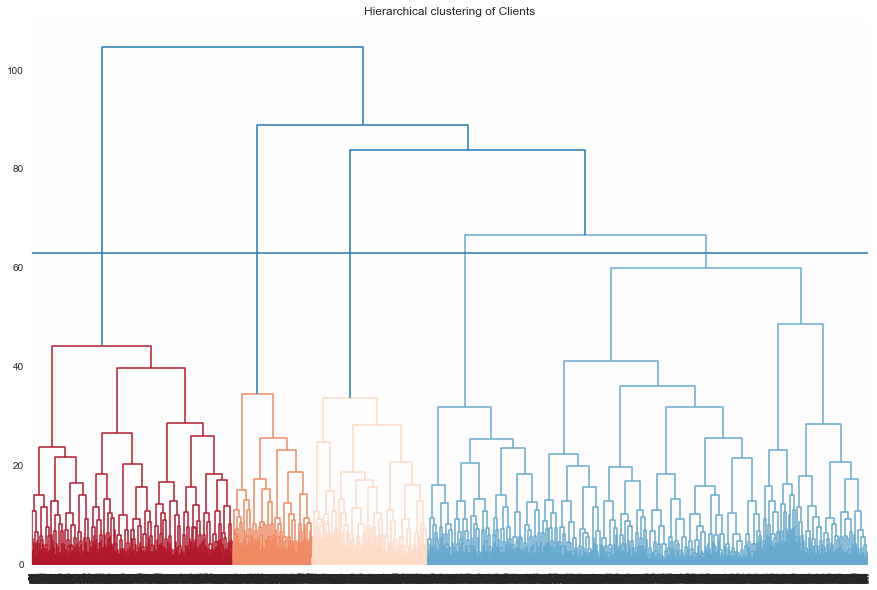

In [14]:
# Standardizing the data
sc = StandardScaler()
x_sc = sc.fit_transform(X)

linked = linkage(x_sc, method = 'ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))  
hierarchy.set_link_color_palette(['#b2182b','#ef8a62', '#fddbc7','#67a9cf', '#2166ac'])
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering of Clients')

# Adding a horizontal line at 63
plt.axhline(y = 63)
plt.show() 

<div class="alert alert-block alert-info">

<font color='blue'><b> Observations :</b>  

The dendrogram above shows us 4 different clusters with 4 different colors. Although this isn't indicative of the optimal number of clusters, it does let us know the the minimal number of clusters is 4. We can see through the graph that the biggest distance between two elements withing the same cluster is present in the last cluster, therefore we have traced a horizontal line in the middle of the branches of this cluster, which leads to the choice of 5 clusters instead of 4, for more distinct groups.
    </font>
</div>

###  K-Means Clustering : <a name="32"></a>

In [15]:
# Clustering the data using K_mean

data_ = data.copy()

# Defining the number of clusters as 5
km = KMeans(n_clusters = 5, random_state = 0)


# Predict the clusters for observations
labels = km.fit_predict(x_sc)

# Storing cluster labels in the field of our dataset
data_['cluster_km'] = labels

# get the statistics of the mean feature values per cluster
cluster_means = data_.groupby('cluster_km', as_index = False).mean()


display(cluster_means)



cluster_km    gender  Near_Location   Partner  Promo_friends     Phone  \
0           0  0.502970       0.959406  0.783168       0.574257  1.000000   
1           1  0.522078       0.862338  0.470130       0.306494  0.000000   
2           2  0.495050       0.000000  0.463366       0.079208  1.000000   
3           3  0.485737       1.000000  0.350238       0.240095  1.000000   
4           4  0.559666       0.976134  0.356802       0.230310  0.998807   

   Contract_period  Group_visits        Age  Avg_additional_charges_total  \
0        10.889109      0.542574  29.982178                    160.761016   
1         4.787013      0.425974  29.301299                    143.957664   
2         2.352475      0.215842  28.477228                    135.457501   
3         1.948494      0.341521  28.167987                    131.622204   
4         2.669451      0.473747  30.125298                    161.657905   

   Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
0               9.954455  4.736634                   1.982055   
1               4.475325  3.924675                   1.847220   
2               2.198020  2.809901                   1.660461   
3               1.856577  2.440571                   1.247634   
4               2.459427  4.898568                   2.852002   

   Avg_class_frequency_current_month     Churn  
0                           1.974789  0.027723  
1                           1.716369  0.267532  
2                           1.477324  0.443564  
3                           1.012983  0.514263  
4                           2.850161  0.068019

<div class="alert alert-block alert-info">
<b>Observations :</b>  
    
The hierchical clustering of clients suggests a minimal number of clusters of 4. We chose 5 as the number of clusters for the next step, in order to get more disctinct groups of clients.

After clustering the clients into 5 different groups, we have calculated the mean of each feature, for each cluster. From the means table, we observe the following :
- Gender is irrelevant as the mean for all clusters is close to 0.5 ;
- The age mean for clusters barely varies between 28 and 30 ;
- The months to end contract are more distinguishing : There are clients whose contracts are soon to end (mean < 3 months left), and others whose contracts are far from ending (mean > 4 months) ;
- The average additional charges mean is similar between cluster 2 and cluster 3 (131 - 135), and between cluster 0 and cluster 4 (161) ;
- Cluster 1 has almost exclusively only clients who haven't provided a phone number ;
- Cluster 3 and 2 have the highest churn means, while clusters 0 and 4 have the lowest ;
- Cluster 2 is only of clients far from location,
- Cluster 2 and 3 are the least to participate in group sessions
</div>

**We plot the distribution graphs of each numerical feature by cluster.**

###  Cluster Visualization : <a name="33"></a>

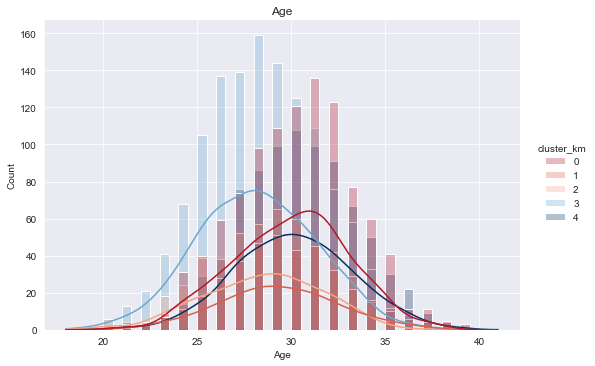

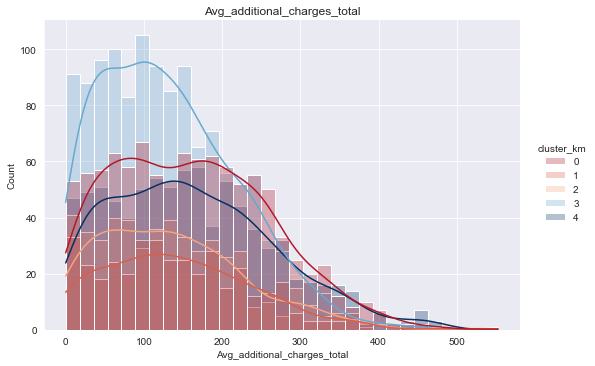

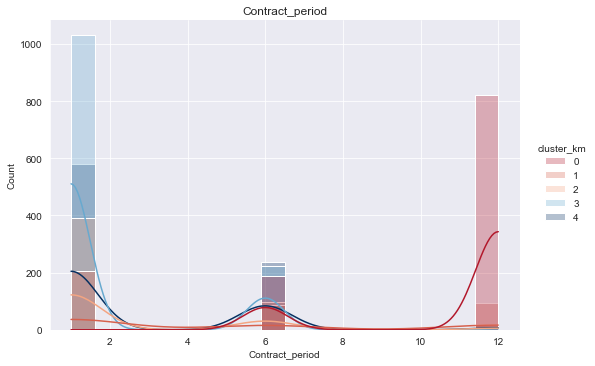

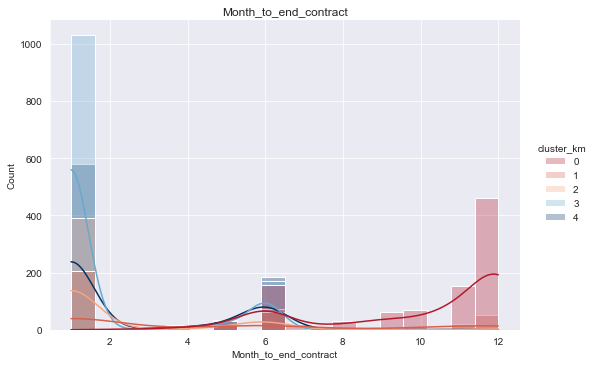

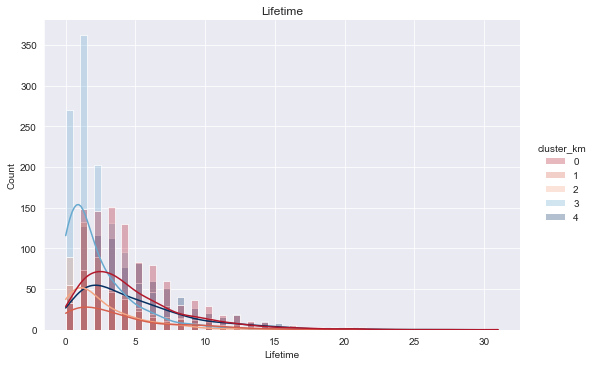

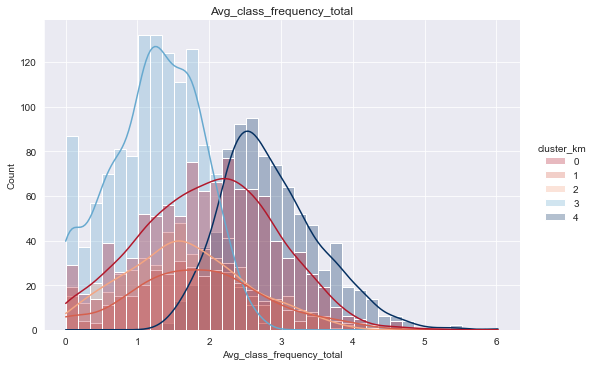

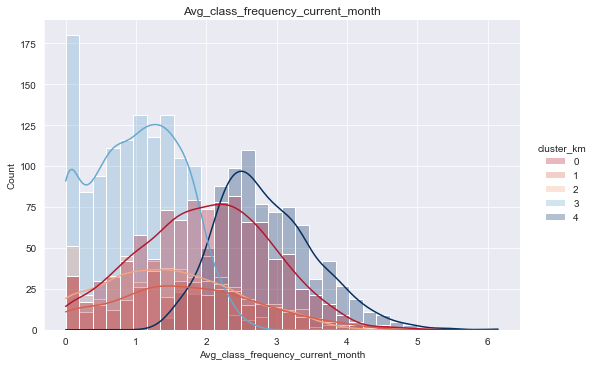

In [16]:
#Plotting the distribution of numerical features for each cluster, to compare
for feature in ['Age', 'Avg_additional_charges_total' , 'Contract_period','Month_to_end_contract' , 'Lifetime', 'Avg_class_frequency_total','Avg_class_frequency_current_month']:
    sns.set_style("darkgrid")
    sns.displot(data_, 
                x = feature, 
                hue = 'cluster_km', 
                kde = True,
                alpha = .3, 
                palette = ['#b2182b','#d6604d', '#f4a582','#67a9cf', '#053061'],
                height = 5 , aspect = 1.5,)
    plt.title(feature)
    plt.show() 

<div class="alert alert-block alert-info">
<b>Observations :</b>  
    
Through the graphs above, we conclude :
- The previous hypothesis that age isn't a factor in client clustering is further confirmed throught the fact that the distributions for each cluster almost overlap, with only a slight variation in the mean ;
- Cluster 1 is exclusively of clients with more than 1 month left in their contract, the rest consist majorly of clients with only 1 month left ;
- Cluster 4 is of regular clients, who have more than 1 session weekly during their lifetime ;
- Cluster 4 has only cliets who have had at least 1 session a week during the current month ;

</div>

**Next, we will calculate the churn count and plot a sunburst diagram by cluster.** which will give us a closer look on the churn behavior of each cluster.

In [17]:
# Creating a churn count dataset
churn_count = data_.groupby(['cluster_km', 'Churn'] , as_index = False).agg({'Age' : 'count'})
churn_count.columns = ['Cluster' , 'Churn' , 'count']

display(churn_count)

# Plotting a sunburst to display protions and percentages 
fig = px.sunburst(churn_count, path=['Cluster', 'Churn'], values='count',
    color = 'Cluster',
    color_continuous_scale='RdBu',
    title ="Churn Rate by Cluster",
    height = 500
)
fig1 = px.sunburst(churn_count, path=['Churn','Cluster'], values='count',
    color = 'Cluster',
    color_continuous_scale='RdBu',
    title ="Churning Clients Distribution",
    height = 500
)
fig.update_traces(textinfo="label+percent parent")
fig1.update_traces(textinfo="label+percent parent")
fig.show()
fig1.show()

Cluster  Churn  count
0        0  False    982
1        0   True     28
2        1  False    282
3        1   True    103
4        2  False    281
5        2   True    224
6        3  False    613
7        3   True    649
8        4  False    781
9        4   True     57

<div class="alert alert-block alert-info">
<b>Observations :</b>  
    
The sunburst graph allows us to see that clusters 0 and 4 have the least churn rate, while clusters 2 and 3 have a close to 50% churn rate. We can also see that cluster 3 is the most to churn : 61% of the clients who churned are from cluster 3. By observing the previous graphs, we can notice a few characteristics of these clusters :  
    
**Characteristics of clients who are less likely to churn** : (Based on cluster 0 and 4)
- They have spent on average more than 160 dollars on extra services,  
- They live or work near the location of the gym,  
- They have provided a phone number,  
- They have been clients for more than 4 months.  
    
**Characteristics of clients who are more likely to churn** : (Based on cluster 3)
- They have spent on average 130 dollars on extra services,
- They are relatively new clients, as they have been clients for less than 3 months,
- Their contracts are ending in less than 2 months,
- In the current month, they have only showed up once a week.

</div> 

## 4.  Conclusion  <a name="4"></a>

<div class="alert alert-block alert-info">

<b>At the end of the study, we conclude that 27% of the gym's clients have churned their contracts, which isn't a small number to be ignored : it's 1061 clients out of the 4000 studies that could have been retained.</b><br>
    

The clustering study has allowed us to identify which clients are most likely to leave. This will help in finding solutions to prevent that from happening.<br>       
        
    
Therefore, based on the characteristics of the clients who are likely to churn, we suggest the following solutions :<br>  
    
1 - Based on the fact that clients who churn are mostly new clients, and that clients who have been affiliated with the gym for more than 4 months, are loyal clients who are less likely to leave, the gym needs to implement a strategy to retain its new clients.<br>   
    
    
This can be done by taking the client through a correct "onboarding" process, by initiating them to the equipment, the facility and the gym's services properly, as a [study](https://blog.mobilefit.com/research-member-retention-fitness-centers/) has found that clients who had 4 sessions of onboarding were 87% more likely to remain and be active after 6 months of joining, while only 60% of members who got 1 onboarding session stayed.<br>  
    
    -> Free onboarding sessions, more available staff to assist new clients, a follow up on the clients' programs and personal goals to garantee a higher engagement...<br>  
    
    
2 - Most of the clients are young adults : 30% between 18 and 27 and 60% between 28 and 33. These clients should be the target of marketing campaigns through social merdia like facebook, instagram and more recent popular platforms among the younger audience like TikTok, while adhering to trends attracting each age group.<br>  

    -> Social media campgains : Live videos on Facebook, ads, stories and reels on instagram, TikTok videos..<br>  
    
3 - Encouraging clients to opt for longer contract periods, preferably the 12 months contract. A [study](https://www.precor.com/en-us/resources/one-million-strong-study-retention) found that gym members with 12 month memberships had a higher rate of retention than members who joined on a month-to-month basis with no commitment.
    
The gym can make the 12 month contract difficult to turn down and more desirable by reducing its price, offering extras with it such as nutritional consulting and access to some sort of privilege that isn't offered to the month-to-month client.<br>  
    
    
4 - Most of the clients who churn are those whose contracts are on the verge of ending : Encourage clients to stay with the gym, by offering reductions on longer term contracts as mentioned above, but also issue reminders through email, phone or SMS, to encourage the client to stay.<br>  
    
    
5 - We have also noticed that clients who spend more money are most likely to stay, so the gym should encourage its clients to join (and pay for of course) more parallel services like cafe, sauna, beauty services, massage, a sports equipment shop, etc..<br>  
    
    
6 - Considering a satisfaction poll to identify other hidden reasons the members might be leaving : not enough equipment? too small space? not enough showers? lacking services? etc. This can be an eye opener to what is missing in the gym.<br>  
  
</div> 